In [5]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple

# Koch Snowflake

In [ ]:
def koch_snowflake_points(
    p1: np.ndarray, 
    p2: np.ndarray, 
    depth: int
) -> List[np.ndarray]:
    if depth == 0:
        return [p1, p2]
    else:
        p1, p2 = np.array(p1), np.array(p2)
        delta = (p2 - p1) / 3
        pA = p1 + delta
        pB = p1 + 2 * delta
        angle = np.pi/3
        tip = pA + np.array([
            np.cos(angle) * delta[0] - np.sin(angle) * delta[1],
            np.sin(angle) * delta[0] + np.cos(angle) * delta[1]
        ])
        
        return (
            koch_snowflake_points(p1, pA, depth-1)[:-1] +
            koch_snowflake_points(pA, tip, depth-1)[:-1] +
            koch_snowflake_points(tip, pB, depth-1)[:-1] +
            koch_snowflake_points(pB, p2, depth-1)
        )

def plot_koch(depth: int = 4) -> None:
    p0 = np.array([0, 0])
    p1 = np.array([1, 0])
    p2 = np.array([0.5, np.sqrt(3)/2])
    
    x = []
    y = []
    
    for seg in [(p0, p1), (p1, p2), (p2, p0)]:
        pts = koch_snowflake_points(seg[0], seg[1], depth)
        xs, ys = zip(*pts)
        x += list(xs)
        y += list(ys)
    
    plt.figure(figsize=(6,6))
    plt.plot(x, y, color='blue')
    plt.axis('equal')
    plt.axis('off')
    plt.title("Koch Snowflake")
    plt.show()

# Fractal Tree

In [ ]:
def fractal_tree(
    x0: float, 
    y0: float, 
    angle: float, 
    branch_length: float, 
    depth: int, 
    lines: List[Tuple[Tuple[float, float], Tuple[float, float]]]
) -> None:
    if depth == 0:
        return
    x1 = x0 + branch_length * np.cos(angle)
    y1 = y0 + branch_length * np.sin(angle)
    lines.append(((x0, x1), (y0, y1)))
    fractal_tree(x1, y1, angle + np.pi/6, branch_length * 0.7, depth - 1, lines)
    fractal_tree(x1, y1, angle - np.pi/6, branch_length * 0.7, depth - 1, lines)

def plot_tree(depth: int = 5) -> None:
    lines = []
    fractal_tree(0, 0, np.pi / 2, 1, depth, lines)
    plt.figure(figsize=(6,6))
    
    for x, y in lines:
        plt.plot(x, y, color='green')
    
    plt.axis('equal')
    plt.axis('off')
    plt.title("Fractal Tree")
    plt.show()

# Sierpinski

In [ ]:
def sierpinski_points(
    p1: np.ndarray, 
    p2: np.ndarray, 
    p3: np.ndarray, 
    depth: int, 
    points: List[List[np.ndarray]]
) -> None:
    if depth == 0:
        points.append([p1, p2, p3])
    else:
        mid12 = (p1 + p2) / 2
        mid23 = (p2 + p3) / 2
        mid31 = (p3 + p1) / 2
        sierpinski_points(p1, mid12, mid31, depth-1, points)
        sierpinski_points(mid12, p2, mid23, depth-1, points)
        sierpinski_points(mid31, mid23, p3, depth-1, points)

def plot_sierpinski(depth: int = 4) -> None:
    points = []
    p0 = np.array([0, 0])
    p1 = np.array([1, 0])
    p2 = np.array([0.5, np.sqrt(3)/2])
    sierpinski_points(p0, p1, p2, depth, points)
    plt.figure(figsize=(6,6))
    
    for tri in points:
        tri_arr = np.array(tri + [tri[0]])  # close triangle
        plt.plot(tri_arr[:,0], tri_arr[:,1], color='red')
    
    plt.axis('equal')
    plt.axis('off')
    plt.title("Sierpinski Triangle")
    plt.show()

# Mandelbrot

In [ ]:
def mandelbrot(
    h: int = 800, 
    w: int = 800, 
    max_iter: int = 100
) -> np.ndarray:
    x = np.linspace(-2.0, 1.0, w)
    y = np.linspace(-1.5, 1.5, h)
    C = x + y[:, None] * 1j
    Z = np.zeros_like(C)
    div_time = max_iter + np.zeros(C.shape, dtype=int)

    for i in range(max_iter):
        Z = Z**2 + C
        diverge = Z * np.conj(Z) > 4
        div_now = diverge & (div_time == max_iter)
        div_time[div_now] = i
        Z[diverge] = 2
    return div_time

def plot_mandelbrot() -> None:
    plt.figure(figsize=(6,6))
    plt.imshow(mandelbrot(), cmap="twilight_shifted")
    plt.axis("off")
    plt.title("Mandelbrot Set")
    plt.show()

# Visualization

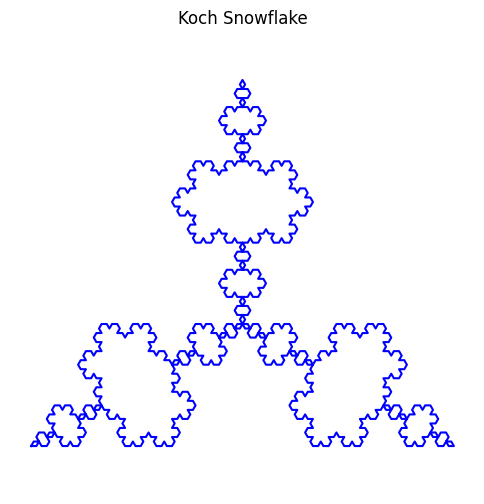

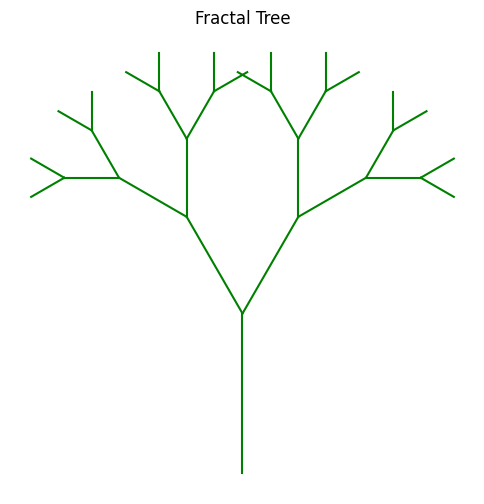

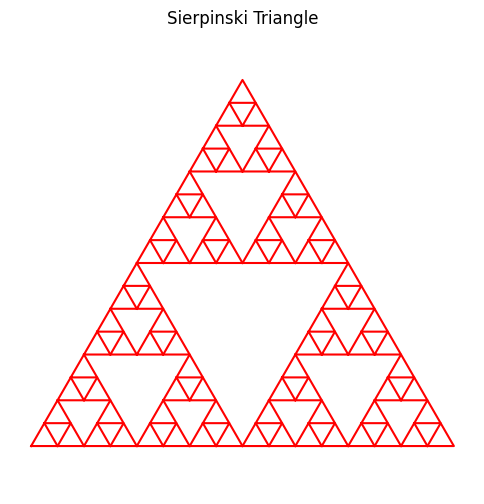

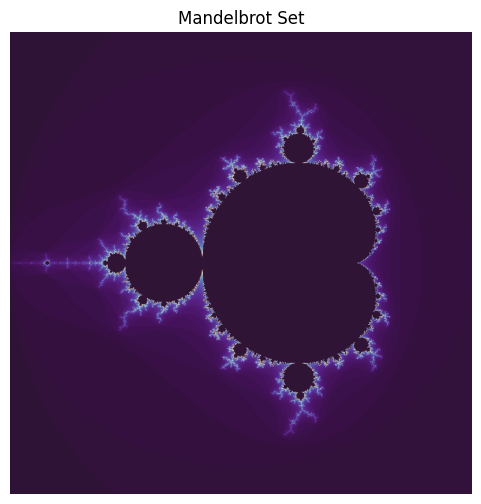

In [7]:
plot_koch(depth=4)
plot_tree(depth=5)
plot_sierpinski(depth=4)
plot_mandelbrot()